<a href="https://colab.research.google.com/github/YashikaMendhekar/SmartPracticeschool-llSPS-INT-730-Intelligent-Customer-Help-Desk-with-Smart-Document-Understanding/blob/master/Project_Mendhekar_Yashika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [5]:
# Load the 20 Newsgroups dataset
data = fetch_20newsgroups()
categories = data.target_names
train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [6]:
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
categories, frequency_train = np.unique (train_data.target, return_counts=True)
categories, frequency_train

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

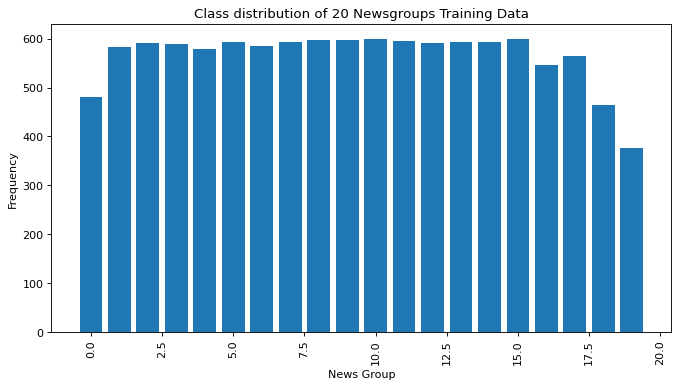

In [11]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar (categories, frequency_train)
plt.xticks (rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [12]:
categories, frequency_test = np.unique (test_data.target, return_counts=True)
categories, frequency_test

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([319, 389, 394, 392, 385, 395, 390, 396, 398, 397, 399, 396, 393,
        396, 394, 398, 364, 376, 310, 251]))

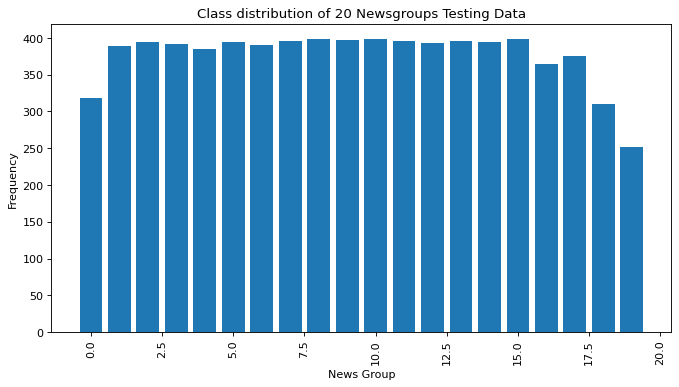

In [13]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar (categories, frequency_test)
plt.xticks (rotation=90)
plt.title('Class distribution of 20 Newsgroups Testing Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Flattening the data

def flatten(list):
  new_list = []
  for i in list:
    for j in i:
      new_list.append(j)
  return new_list


In [15]:
traindata=flatten(train_data.data)

In [16]:
testdata=flatten (test_data.data)

In [21]:
# Vectorize the text data
from sklearn. feature_extraction.text import CountVectorizer
count_vec = CountVectorizer ()
X_train_count = count_vec.fit_transform(train_data.data)
X_test_count = count_vec.transform(test_data.data)

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
Tfid_transformer = TfidfTransformer()
X_train_tfidf = Tfid_transformer.fit_transform(X_train_count)
X_test_tfidf = Tfid_transformer.transform(X_test_count)
X_test_tfidf.shape

(7532, 130107)

In [61]:
# PCA before model implementation
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

# Apply TruncatedSVD on the TF-IDF features
n_components = 100
svd = TruncatedSVD(n_components=n_components)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

scaler = MinMaxScaler()
X_train_svd_scaled = scaler.fit_transform(X_train_svd)
X_test_svd_scaled = scaler.transform(X_test_svd)


In [19]:
# Train the Multinomial Naive Bayes classifier
nb = MultinomialNB()
y_train = train_data.target
nb.fit(X_train_count, y_train)

MultinomialNB()

In [22]:
# Make predictions on the test set
y_pred_nb = nb.predict(X_test_count)

In [23]:
# Evaluate the model on the test set
print("Accuracy:", accuracy_score(test_data.target, y_pred_nb))
print("\nClassification Report:\n", classification_report(test_data.target, y_pred_nb))

Accuracy: 0.7728359001593202

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       319
           1       0.67      0.74      0.70       389
           2       0.20      0.00      0.01       394
           3       0.56      0.77      0.65       392
           4       0.84      0.75      0.79       385
           5       0.65      0.84      0.73       395
           6       0.93      0.65      0.77       390
           7       0.87      0.91      0.89       396
           8       0.96      0.92      0.94       398
           9       0.96      0.87      0.91       397
          10       0.93      0.96      0.95       399
          11       0.67      0.95      0.78       396
          12       0.79      0.66      0.72       393
          13       0.87      0.82      0.85       396
          14       0.83      0.89      0.86       394
          15       0.70      0.96      0.81       398
          16       0.69    

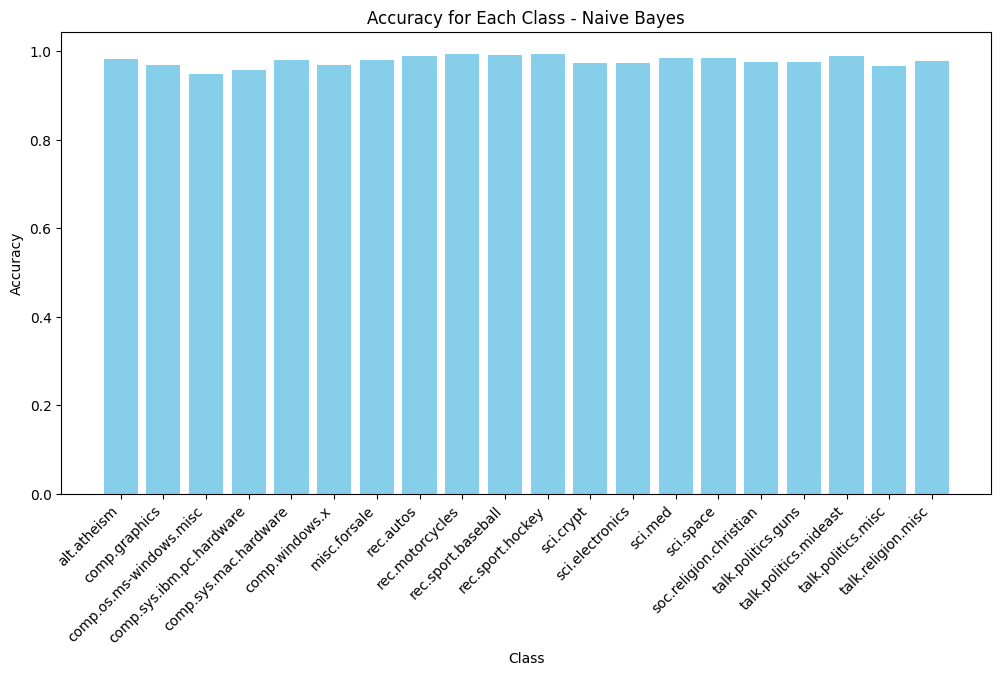

In [24]:
# Visualize accuracy for each class using a bar chart
class_labels = train_data.target_names
accuracy_per_class = [accuracy_score(test_data.target == i, y_pred_nb == i) for i in range(len(class_labels))]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(class_labels, accuracy_per_class, color='skyblue')
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Each Class - Naive Bayes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [62]:
# Train the Multinomial Naive Bayes classifier
nb_svd = MultinomialNB()
nb_svd.fit(X_train_svd_scaled, y_train)

# Evaluate the model performance on the original test set
print("Performance before TruncatedSVD:")
evaluate_model(nb, X_test_tfidf, test_data.target)

# Evaluate the model performance on the scaled SVD-transformed test set
print("\nPerformance after TruncatedSVD:")
evaluate_model(nb_svd, X_test_svd_scaled, test_data.target)

Performance before TruncatedSVD:
Accuracy: 0.8147902283590016

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       319
           1       0.63      0.81      0.71       389
           2       0.86      0.08      0.15       394
           3       0.55      0.79      0.65       392
           4       0.84      0.81      0.82       385
           5       0.72      0.83      0.77       395
           6       0.89      0.76      0.82       390
           7       0.90      0.92      0.91       396
           8       0.95      0.97      0.96       398
           9       0.95      0.94      0.95       397
          10       0.93      0.98      0.95       399
          11       0.84      0.95      0.89       396
          12       0.79      0.75      0.77       393
          13       0.88      0.88      0.88       396
          14       0.83      0.93      0.88       394
          15       0.82      0.95      0.88     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vectore Machine (SVM)

In [25]:
# Train the SVM
from sklearn. feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_train = tf.fit_transform(train_data.data)
X_test= tf.transform(test_data.data)
X_train.shape, X_test.shape

((11314, 130107), (7532, 130107))

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_test= test_data.target

In [35]:
svc=SVC()

In [28]:
svc.fit(X_train, y_train)

SVC()

In [29]:
y_pred_svc= svc.predict(X_test)
y_pred_svc

array([12,  1,  0, ...,  9, 12, 15])

In [36]:
print(accuracy_score(y_test, y_pred_svc))

0.8186404673393521


In [37]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       319
           1       0.62      0.82      0.71       389
           2       0.80      0.70      0.75       394
           3       0.73      0.78      0.76       392
           4       0.82      0.83      0.82       385
           5       0.83      0.73      0.77       395
           6       0.73      0.91      0.81       390
           7       0.90      0.87      0.89       396
           8       0.96      0.93      0.95       398
           9       0.88      0.91      0.90       397
          10       0.97      0.91      0.94       399
          11       0.96      0.85      0.90       396
          12       0.65      0.85      0.74       393
          13       0.88      0.78      0.82       396
          14       0.93      0.88      0.90       394
          15       0.79      0.92      0.85       398
          16       0.75      0.88      0.81       364
          17       0.97    

In [32]:
print (test_data.target)
print (y_pred_svc)

[ 7  5  0 ...  9  6 15]
[12  1  0 ...  9 12 15]


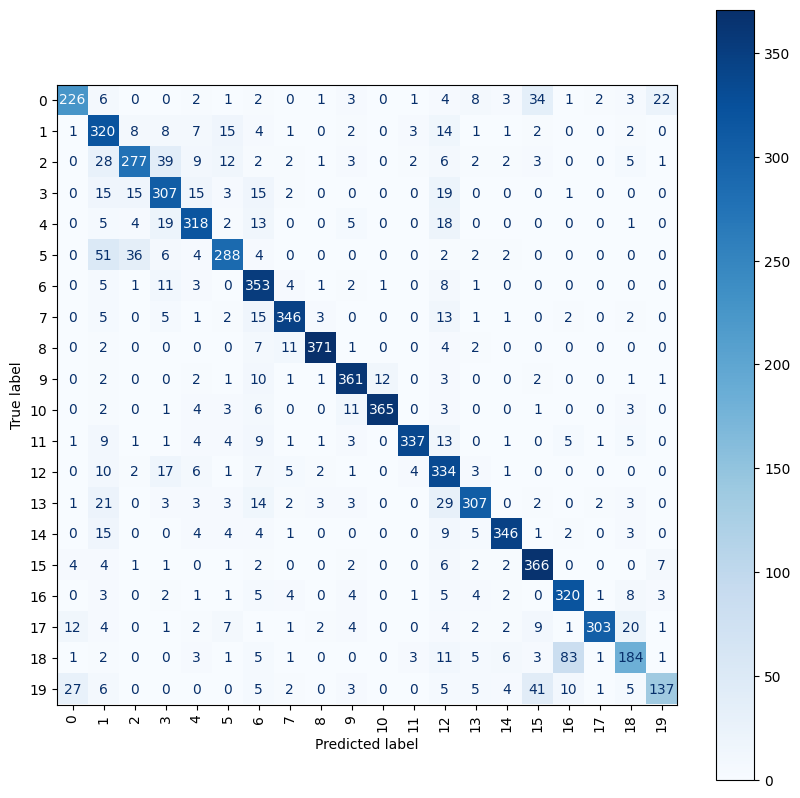

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay (confusion_matrix=cm,display_labels=categories)
fig, ax = plt.subplots (figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='Blues')
plt.show()

In [66]:
# Train the Support Vector Machine (SVM) classifier
svm_svd = SVC()
svm_svd.fit(X_train_svd_scaled, y_train)

# Evaluate the model performance on the scaled SVD-transformed test set
print("\nPerformance after TruncatedSVD:")
evaluate_model(svm_svd, X_test_svd_scaled, y_test)


Performance after TruncatedSVD:
Accuracy: 0.7395114179500797

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67       319
           1       0.53      0.67      0.59       389
           2       0.71      0.67      0.69       394
           3       0.63      0.61      0.62       392
           4       0.74      0.71      0.73       385
           5       0.76      0.64      0.70       395
           6       0.78      0.85      0.81       390
           7       0.81      0.81      0.81       396
           8       0.93      0.87      0.90       398
           9       0.84      0.85      0.85       397
          10       0.93      0.90      0.91       399
          11       0.92      0.82      0.87       396
          12       0.50      0.64      0.56       393
          13       0.65      0.70      0.67       396
          14       0.86      0.84      0.85       394
          15       0.80      0.84      0.82     

K Nearest Neighbors (KNN)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [45]:
# Train the K Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=3)
y_train = train_data.target
knn.fit(X_train[:1000], y_train[:1000])

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test[:1000])

In [47]:
# Evaluate the model on the test set
print("Accuracy:", accuracy_score(test_data.target[:1000], y_pred_knn))
print("\nClassification Report:\n", classification_report(test_data.target[:1000], y_pred_knn))


Accuracy: 0.379

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.76      0.13        37
           1       0.36      0.33      0.34        40
           2       0.51      0.48      0.50        52
           3       0.37      0.31      0.34        54
           4       0.50      0.35      0.42        62
           5       0.64      0.30      0.41        60
           6       0.41      0.36      0.38        39
           7       0.61      0.42      0.49        53
           8       0.61      0.36      0.45        61
           9       0.74      0.34      0.47        58
          10       0.75      0.35      0.48        69
          11       0.78      0.65      0.71        43
          12       0.30      0.06      0.10        48
          13       0.90      0.20      0.33        45
          14       0.82      0.58      0.68        55
          15       0.80      0.43      0.56        56
          16       0.60      0.26      0

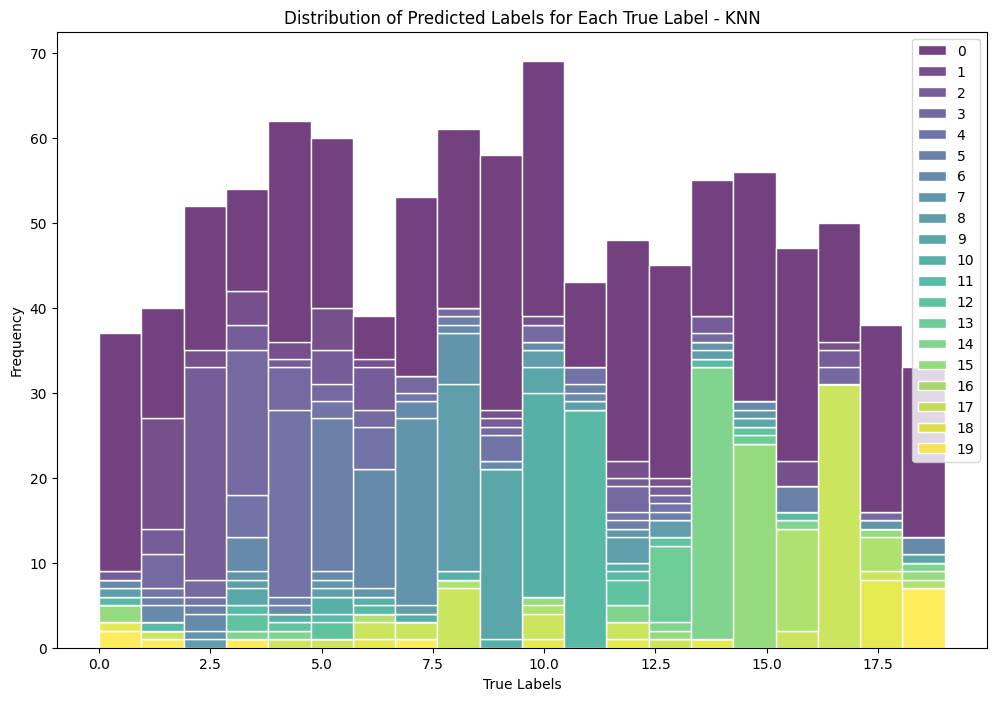

In [48]:
# Visualize the distribution of predicted labels for each true label
plt.figure(figsize=(12, 8))
sns.histplot(x=test_data.target[:1000], hue=y_pred_knn, multiple="stack", palette="viridis", edgecolor='w', bins=20)
plt.title("Distribution of Predicted Labels for Each True Label - KNN")
plt.xlabel("True Labels")
plt.ylabel("Frequency")
plt.show()


In [69]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

# Train the K Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:1000], y_train[:1000])

# Make predictions on the test set
y_pred_knn = knn.predict(X_test[:1000])

# Evaluate the model on the original test set
print("Performance before TruncatedSVD:")
print("Accuracy:", accuracy_score(test_data.target[:1000], y_pred_knn))
print("\nClassification Report:\n", classification_report(test_data.target[:1000], y_pred_knn))

# Apply TruncatedSVD
n_components = 100
svd = TruncatedSVD(n_components=n_components)
X_train_svd = svd.fit_transform(X_train[:1000])
X_test_svd = svd.transform(X_test[:1000])

scaler = MinMaxScaler()
X_train_svd_scaled = scaler.fit_transform(X_train_svd)
X_test_svd_scaled = scaler.transform(X_test_svd)

# Train the K Nearest Neighbors (KNN) classifier on the scaled SVD-transformed data
knn_svd = KNeighborsClassifier(n_neighbors=3)
knn_svd.fit(X_train_svd_scaled, y_train[:1000])

y_pred_knn_svd = knn_svd.predict(X_test_svd_scaled)

# Evaluate the model on the SVD-transformed test set
print("\nPerformance after TruncatedSVD:")
print("Accuracy with TruncatedSVD:", accuracy_score(test_data.target[:1000], y_pred_knn_svd))
print("\nClassification Report with TruncatedSVD:\n", classification_report(test_data.target[:1000], y_pred_knn_svd))


Performance before TruncatedSVD:
Accuracy: 0.379

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.76      0.13        37
           1       0.36      0.33      0.34        40
           2       0.51      0.48      0.50        52
           3       0.37      0.31      0.34        54
           4       0.50      0.35      0.42        62
           5       0.64      0.30      0.41        60
           6       0.41      0.36      0.38        39
           7       0.61      0.42      0.49        53
           8       0.61      0.36      0.45        61
           9       0.74      0.34      0.47        58
          10       0.75      0.35      0.48        69
          11       0.78      0.65      0.71        43
          12       0.30      0.06      0.10        48
          13       0.90      0.20      0.33        45
          14       0.82      0.58      0.68        55
          15       0.80      0.43      0.56        56
       

Logistic Regression

In [80]:
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle

# Set hyperparameters
learning_rate = 'optimal'
alpha = 0.0001
epochs = 50
batch_size = 32

In [50]:
from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression classifier
lr = LogisticRegression()
y_train = train_data.target
lr.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

In [53]:
from sklearn.preprocessing import label_binarize
# Binarize true and predicted labels for each class
y_test_bin = label_binarize(test_data.target, classes=np.unique(test_data.target))
y_pred_lr_bin = label_binarize(y_pred_lr, classes=np.unique(test_data.target))

In [81]:
# Initialize logistic regression model with SGD
sgd_logistic_model = SGDClassifier(loss='log', learning_rate=learning_rate, alpha=alpha, max_iter=epochs, random_state=42)
for epoch in range(epochs):
    X_train_tfidf, y_train = shuffle(X_train_tfidf, train_data.target)

    for batch_start in range(0, len(y_train), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_tfidf[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        # Fit the logistic regression model with SGD on the mini-batch
        sgd_logistic_model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# After training, use the trained SGD logistic regression model for predictions on new data
y_pred_sgd = sgd_logistic_model.predict(X_test_tfidf)
accuracy_sgd = accuracy_score(test_data.target, y_pred_sgd)
print("Accuracy (SGD):", accuracy_sgd)
print("\nClassification Report (SGD):\n", classification_report(test_data.target, y_pred_sgd))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy (SGD): 0.06797663303239511

Classification Report (SGD):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.07      0.03      0.04       389
           2       0.08      0.08      0.08       394
           3       0.05      0.03      0.03       392
           4       0.16      0.03      0.05       385
           5       0.04      0.03      0.03       395
           6       0.09      0.04      0.05       390
           7       0.14      0.31      0.20       396
           8       0.07      0.25      0.10       398
           9       0.05      0.08      0.06       397
          10       0.03      0.06      0.04       399
          11       0.06      0.07      0.06       396
          12       0.10      0.18      0.13       393
          13       0.07      0.06      0.07       396
          14       0.03      0.01      0.02       394
          15       0.02      0.03      0.02       398
          16  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print (accuracy_score(y_test, y_pred_lr))

0.8274030801911842


In [71]:
print (classification_report (y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       319
           1       0.69      0.79      0.74       389
           2       0.75      0.73      0.74       394
           3       0.72      0.72      0.72       392
           4       0.81      0.83      0.82       385
           5       0.83      0.74      0.78       395
           6       0.76      0.90      0.82       390
           7       0.90      0.89      0.90       396
           8       0.95      0.95      0.95       398
           9       0.88      0.92      0.90       397
          10       0.94      0.95      0.95       399
          11       0.94      0.88      0.91       396
          12       0.76      0.80      0.78       393
          13       0.89      0.83      0.85       396
          14       0.91      0.92      0.91       394
          15       0.81      0.94      0.87       398
          16       0.72      0.88      0.79       364
          17       0.96    

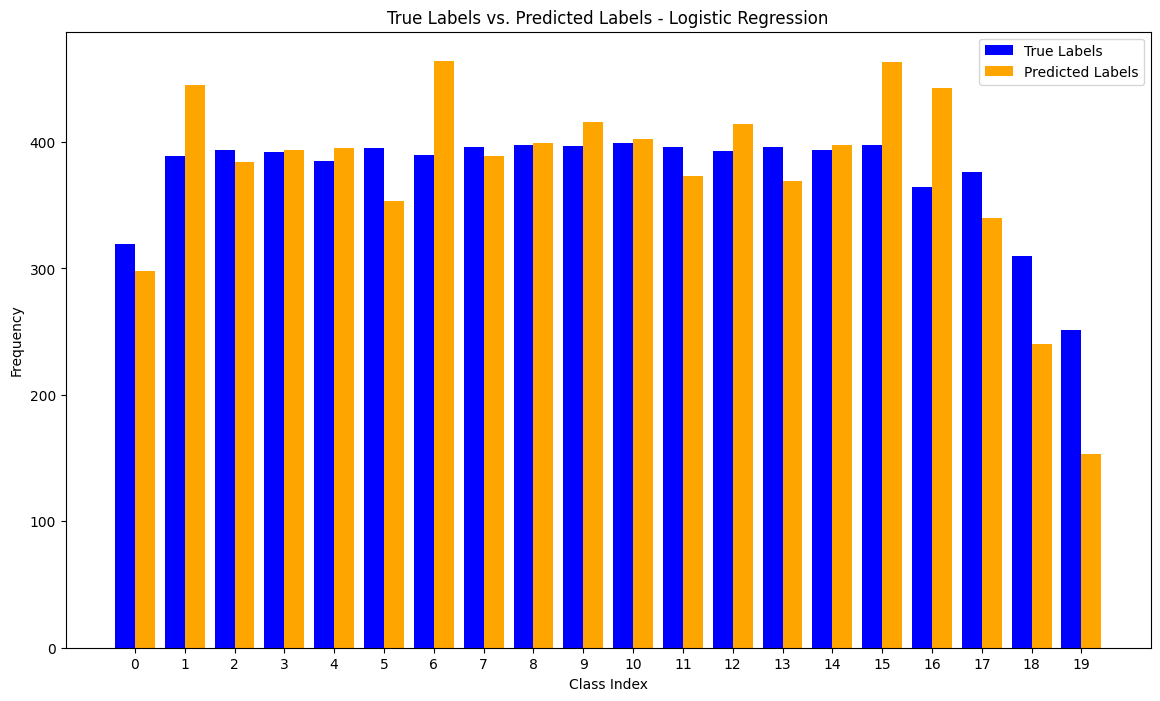

In [54]:
# Plot stacked bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.4
bar_positions = np.arange(len(np.unique(test_data.target)))

plt.bar(bar_positions, np.sum(y_test_bin, axis=0), width=bar_width, label='True Labels', color='blue')
plt.bar(bar_positions + bar_width, np.sum(y_pred_lr_bin, axis=0), width=bar_width, label='Predicted Labels', color='orange')

plt.xlabel('Class Index')
plt.ylabel('Frequency')
plt.title('True Labels vs. Predicted Labels - Logistic Regression')
plt.xticks(bar_positions + bar_width / 2, np.unique(test_data.target))
plt.legend()
plt.show()

In [75]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Binarize true and predicted labels for each class
y_test_bin = label_binarize(test_data.target, classes=np.unique(test_data.target))
y_pred_lr_bin = label_binarize(y_pred_lr, classes=np.unique(test_data.target))

# Print accuracy and classification report for the original data
print("Accuracy on original data:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report on original data:\n", classification_report(y_test, y_pred_lr))

n_components = 100
svd = TruncatedSVD(n_components=n_components)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

scaler = MinMaxScaler()
X_train_svd_scaled = scaler.fit_transform(X_train_svd)
X_test_svd_scaled = scaler.transform(X_test_svd)

# Train the Logistic Regression classifier on the scaled SVD-transformed data
lr_svd = LogisticRegression()
lr_svd.fit(X_train_svd_scaled, y_train)

y_pred_lr_svd = lr_svd.predict(X_test_svd_scaled)

y_pred_lr_svd_bin = label_binarize(y_pred_lr_svd, classes=np.unique(test_data.target))

# Print accuracy and classification report
print("\nAccuracy with TruncatedSVD:", accuracy_score(y_test, y_pred_lr_svd))
print("\nClassification Report with TruncatedSVD:\n", classification_report(y_test, y_pred_lr_svd))


Accuracy on original data: 0.8274030801911842

Classification Report on original data:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       319
           1       0.69      0.79      0.74       389
           2       0.75      0.73      0.74       394
           3       0.72      0.72      0.72       392
           4       0.81      0.83      0.82       385
           5       0.83      0.74      0.78       395
           6       0.76      0.90      0.82       390
           7       0.90      0.89      0.90       396
           8       0.95      0.95      0.95       398
           9       0.88      0.92      0.90       397
          10       0.94      0.95      0.95       399
          11       0.94      0.88      0.91       396
          12       0.76      0.80      0.78       393
          13       0.89      0.83      0.85       396
          14       0.91      0.92      0.91       394
          15       0.81      0.94      0.87    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
